In [1]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

#Fitting the part. Th

In [2]:
import glob,csv
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))

17
found *.csv file: 
['/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/

In [3]:
file_num=12
marker=['>','o','o','o','o','s','s','s','s','s','s','^']

WLS_err1=np.empty([file_num,1])
WLS_coef1=np.empty([file_num,1])
WLS_errc=np.empty([file_num,1])
WLS_coefc=np.empty([file_num,1])
sinking_rate=np.empty([file_num,1])

rss1=np.empty([file_num,1])
rss2=np.empty([file_num,1])


1983 CESAR
df:(1,4)
F ratio: 0.644365603688
ftest:0.467119171145
sinking   :5.447018e+02,error:3.175587e+02

1987 ARKIV/3 Stn1
df:(1,6)
F ratio: 2.33222621671
ftest:0.177576717845
sinking   :6.292958e+02,error:1.344860e+02

1987 ARKIV/3 Stn2
df:(1,5)
F ratio: 6.32457149555
ftest:0.0535087306338
sinking   :7.788012e+02,error:9.895013e+01

1987 ARKIV/3 Stn3
df:(1,5)
F ratio: 0.72058181521
ftest:0.434700838753
sinking   :2.284856e+02,error:2.759698e+01

1987 ARKIV/3 Stn4
df:(1,4)
F ratio: -0.104666323551
ftest:1.0
sinking   :5.255132e+02,error:4.295360e+02

1991 ARCTIC EXPEDITION Stn1
df:(1,3)
F ratio: 45.1968765485
ftest:0.00671821600264
sinking   :1.267868e+03,error:2.478135e+02

1991 ARCTIC EXPEDITION Stn2
df:(1,2)
F ratio: 402.620036795
ftest:0.00247451608842
sinking   :8.718359e+02,error:1.480314e+01

1991 ARCTIC EXPEDITION Stn3
df:(1,4)
F ratio: 46.5213319739
ftest:0.00241568101013
sinking   :4.708677e+02,error:4.540157e+01

1991 ARCTIC EXPEDITION Stn4
df:(1,4)
F ratio: 178.0367833

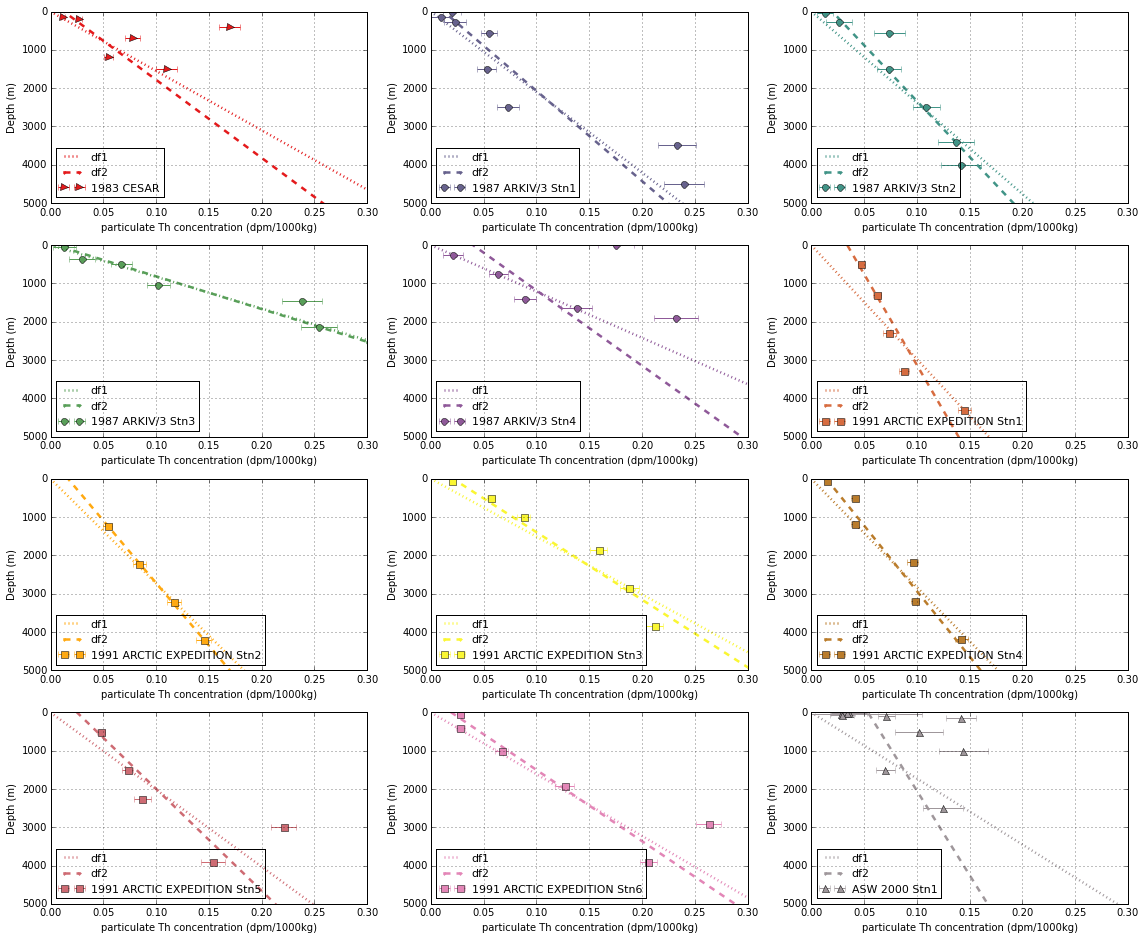

In [4]:
#ax = plt.figure(1,figsize=(10,7))
for j in range(file_num):

    data=pd.read_csv(nc_filename[j])

    y= data['depth'];
    name= data['name'][0];
    x=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_part_err']
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    
    y2 = sm.add_constant(y,prepend=False)
    #y2=y
    res_wls = sm.WLS(x, y2, weights=1./err**2).fit()
    
    ftest=sm.WLS(x, y, weights=1./err**2).fit()


    model1=np.sum(ftest.resid**2/err**4)
    model2=np.sum(res_wls.resid**2/err**4)
    rss1[j]=model1
    rss2[j]=model2
    
    p1 = 1
    p2 = 2
    n = len(x)
    #F = (ftest.mse_resid - res_wls.mse_resid)/(res_wls.mse_resid) *(n-p2)/(p2-p1)
    F = ( model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    WLS_err1[j,:] = res_wls.bse[0]
    WLS_coef1[j,:] = res_wls.params[0]
    sinking_rate[j,:]=0.0267/res_wls.params[0]
    err1=(WLS_err1[j,:]/WLS_coef1[j,:])*1/WLS_coef1[j,:]*0.0267
  
    
    
    print ('')
    print (name)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('F ratio: %s'%F)
    print ('ftest:%s'%p)
    print ('sinking   :%e,error:%e'%(sinking_rate[j,:],err1))

    
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)#Spectral(j*23)
    ax.plot([0, 0.3],[0, 0.3]/ftest.params[0], ':',c=cc,linewidth=2.5,label='df1')
    ax.plot([0, 0.3],[0, 0.3]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)
    ax.legend(loc=3,fontsize=11)
    
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 0.3])
#    if j+1==1 or j+1==5 or j+1==9:
    plt.ylabel('Depth (m)')
#    if j+1==10 or j+1==11: #or j+1==9:
#        plt.xlabel('Particulate Th concentration (dpm/1000kg)')
    plt.xlabel('particulate Th concentration (dpm/1000kg)')
#    plt.ylabel('Depth (m)')
#    if not(j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.gca().invert_yaxis()
    plt.grid()
    plt.tight_layout()
#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)
plt.show()

In [5]:
#f_test
p1 = 1
p2 = 2
n = 77
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*12)/(p2*10-p1*12)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*12,(n-p2*12)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(12,53)
F ratio: 86.5300456004
ftest:3.97459842816e-14


#fitting the diss. Th

####(1) Change into fit Q-C{1}K{-1}-K{-1}Qz/S

In [6]:
WLS_err2=np.empty([file_num,1])
Kvalue=np.empty([file_num,1])
WLS_coef2=np.empty([file_num,1])


1983 CESAR
F ratio: -0.409605131099
df:(1,5)
ftest:1.0
K   :1.027311e-01,error:2.124342e-02
df1 weighted resid. sum:180539.922255
df2 weighted resid. sum:196649.664583
df1:[  1.40622062e+04   1.46643342e+05   5.22470391e+03   2.46539219e+03
   1.16755624e+04   4.97173786e+01   4.18997779e+02]
df2:[  37564.85570345  140371.09779038    5319.44358797    2139.57100495
   10402.29873338     248.38569562     604.01206716]

1987 ARKIV/3 Stn1
F ratio: 5.29989987565
df:(1,6)
ftest:0.0609205669755
K   :1.218631e+00,error:5.996814e-01

1987 ARKIV/3 Stn2
F ratio: -0.427395000202
df:(1,5)
ftest:1.0
K   :3.266772e-01,error:6.285372e-02
df1 weighted resid. sum:97101.0993775
df2 weighted resid. sum:106177.003461
df1:[  2.78430721e+04   1.23368892e+03   6.76728083e+02   5.94790591e+04
   2.37889777e+01   3.82116353e+02   7.46264587e+03]
df2:[  3.85113788e+04   4.98321898e+02   5.87775538e+02   5.93055648e+04
   5.00691388e+01   3.17685860e+02   6.90620741e+03]

1987 ARKIV/3 Stn3
F ratio: 18.4676922938

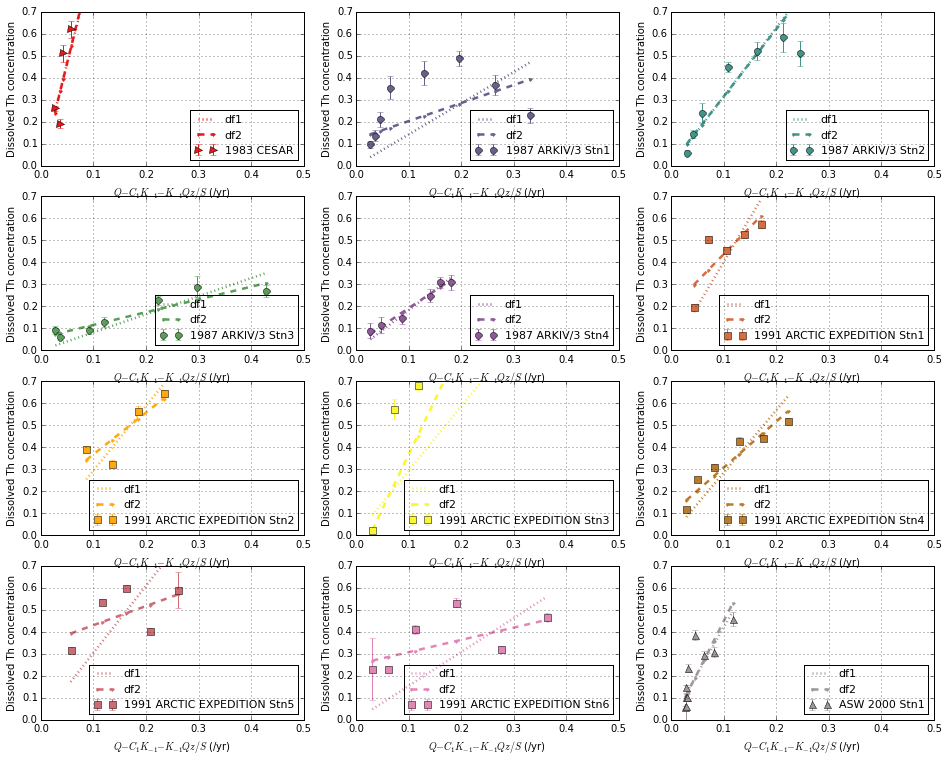

In [7]:
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    x= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_diss_err']
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    y2=np.empty(len(x))
    for k in range (len(x)):
        y2[k]=(0.0267-WLS_coef1[j,:]*1.6)+(0.0267*1.6/sinking_rate[j])*y[k]
    
    #fit: model2
    y3 = sm.add_constant(y2,prepend=False)  
    res_wls2 = sm.WLS(x,y3, weights=1./err**2).fit() 
    
    Kvalue[j]=1/res_wls2.params[0]
    WLS_coef2[j]=res_wls2.params[0]
    WLS_err2[j]=res_wls2.bse[0]
    err2=res_wls2.bse[0]/res_wls2.params[0]*Kvalue[j]
    
    #fit: model1
    ftest=sm.WLS(x, y2, weights=1./err**2).fit()     
    
    #calculate weighted resid. sum
    resid1=ftest.resid**2/err**4                
    model1=np.sum(resid1)

    resid2=res_wls2.resid**2/err**4
    model2=np.sum(resid2)
    
    #prepare data to recalculate the whole profile later
    rss1[j]=model1                
    rss2[j]=model2

    #f_test
    p1 = 1
    p2 = 2
    n = len(x)
    F = (model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    #print related data
    print ('')
    print (name)
    print ('F ratio: %s'%F)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('ftest:%s'%p)
    print ('K   :%e,error:%e'%(Kvalue[j,:],err2))
    if F<=0:
        print ('df1 weighted resid. sum:%s'%model1)
        print ('df2 weighted resid. sum:%s'%model2)
        print ('df1:%s'%resid1)
        print ('df2:%s'%resid2)

    
    #plot
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)
    ax.plot(y2, ftest.fittedvalues, ':',c=cc,linewidth=2.5,label='df1')
    ax.plot(y2, res_wls2.fittedvalues, '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(y2,x,yerr=err, fmt=marker[j],markersize=7,c=cc,label=name)    
    ax.legend(loc=4,fontsize=11)

    ax.set_ylim([0, 0.7])
    ax.set_xlim([0, 0.5])
#    if j+1==5: #or j+1==5 or j+1==9:
    plt.ylabel('Dissolved Th concentration')# (dpm/1000kg)')
#    if j+1==10 or j+1==11: #or j+1==9:
    plt.xlabel('$Q-C_{1}K_{-1}-K_{-1}Qz/S$ (/yr)')
#    if not(j+1==8 or j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.grid()

#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)   
plt.show()

In [8]:
p1 = 1
p2 = 2
n = 77
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*12)/(p2*10-p1*12)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*12,(n-p2*12)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(12,53)
F ratio: 342.000656679
ftest:1.11022302463e-16


# WLS: sinking rate and the ice concentration

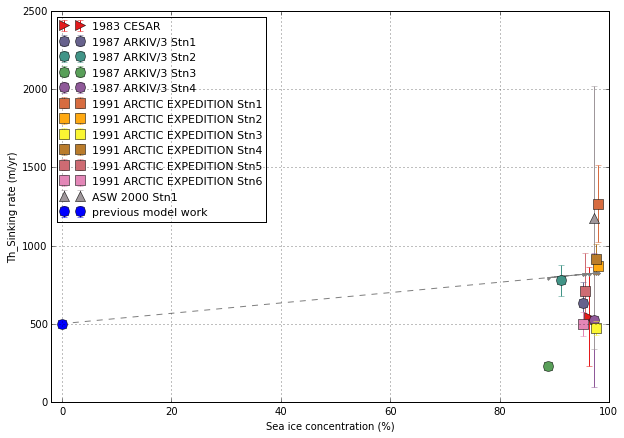

In [9]:
i=np.empty([file_num,1])
#for j in range(11):
#    data=pd.read_csv(nc_filename[j])
#    i[j,:]= data['ice'][0];
i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2,97.2]) #'remember to add i'
#marker=      ['o','o','o','o',   '^','s','s','s','s','s', 's','D','D','>']
    
err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
#((WLS_err1/WLS_coef1)**2)**(0.5)
sinking_rate=numpy.append(sinking_rate,500)
i=numpy.append(i,0)
err1=numpy.append(err1,0.0001)
i2 = sm.add_constant(i,prepend=False)
mod_wls3 = sm.WLS(sinking_rate,i2,weights=1./err1**4) #Is it the real error?
res_wls3 = mod_wls3.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls3.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)

ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Sinking rate (m/yr)')

#ax.set_ylim([0, 5000])
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [10]:
print res_wls3.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            WLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     41.53
Date:                Mon, 13 Jul 2015   Prob (F-statistic):           4.78e-05
Time:                        11:26:07   Log-Likelihood:                 1.2264
No. Observations:                  13   AIC:                             1.547
Df Residuals:                      11   BIC:                             2.677
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3166      0.515      6.444      0.000         2.184     4.449
const        500.0000   2.39e-09   2.09e+11      0.0

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1205: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  int(n))


In [11]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'sinking_rate':sinking_rate, 'i3': i})
res_wls5 = wls('sinking_rate~i3', data,weights=1./(err1**4)).fit()

In [12]:
a=average(sinking_rate)
#print a
#print sinking_rate

In [13]:
rss=(sinking_rate-a)**2/err1**4
rss_sum=sum(rss)
p1 = 1
p2 = 2
n = file_num
F = (rss_sum - np.sum(res_wls5.resid**2/err1**4))/(np.sum(res_wls5.resid**2/err1**4)) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('F ratio: %s'%F)
print ('df:(%s,%s)'%((p2-p1),(n-p2)))
print ('ftest:%s'%p)

F ratio: 6.43695891822e+21
df:(1,10)
ftest:0.0


# WLS: K value and the ice concentration

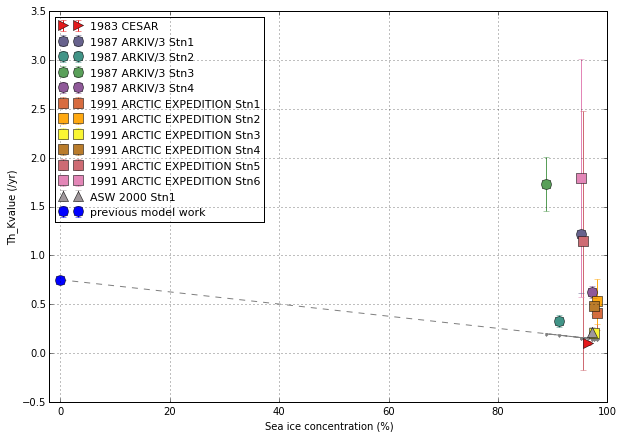

In [14]:
err2=WLS_err2/WLS_coef2*Kvalue
#err2= ((WLS_err1/WLS_coef1)+(WLS_err2/WLS_coef2))* WLS_coef1/WLS_coef2*1.6# error of k value K-1=1
#(WLS_coef1**(-4)*(WLS_coef2**(-2))*(WLS_err1)**2+WLS_coef2**(-4)*(WLS_coef1**(-2))*(WLS_err2)**2)**(0.5)
#((WLS_err1/WLS_coef1)**2+(WLS_err2/WLS_coef2)**2)**(0.5) # error of k value K-1=1

Kvalue=numpy.append(Kvalue,0.75)
err2=numpy.append(err2,0.0001)

mod_wls4 = sm.WLS(Kvalue, i2, weights=1./err2**4)
res_wls4 = mod_wls4.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)
    
errorbar(i[-1],Kvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [15]:
print res_wls4.summary() 

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            WLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     808.2
Date:                Mon, 13 Jul 2015   Prob (F-statistic):           1.20e-11
Time:                        11:26:15   Log-Likelihood:                -70.689
No. Observations:                  13   AIC:                             145.4
Df Residuals:                      11   BIC:                             146.5
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0062      0.000    -28.428      0.000        -0.007    -0.006
const          0.7500   6.05e-07   1.24e+06      0.0

In [16]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'Kvalue':Kvalue, 'i3': i})
mod_wls6 = wls('Kvalue~i3', data,weights=1./(err2**4))
res_wls6 = mod_wls6.fit()
#print res_wls6.summary()

b=average(Kvalue)
print ('average k:%s'%b)
rss2=(Kvalue-b)**2/(err2**4)
rss2_sum=sum(rss2)

p1 = 1
p2 = 2
n = file_num
F = (rss2_sum - np.sum(res_wls6.resid**2/err2**4))/(np.sum(res_wls6.resid**2/err2**4)) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1),(n-p2)))
print ('F ratio: %s'%F)
print ('pvalue:%s'%p)

average k:0.732684028054
df:(1,10)
F ratio: 745328676.66
pvalue:1.11022302463e-16


# map

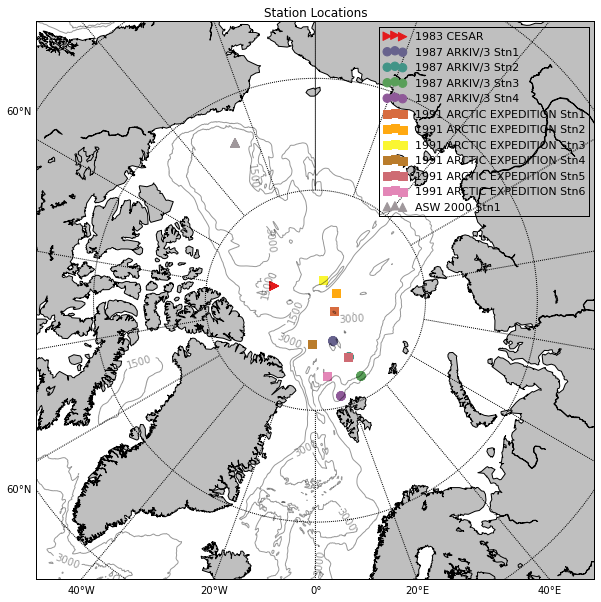

In [42]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.Set1(j*23),marker=marker[j],s=70,label=name)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title("Station Locations")
plt.legend(loc=1,fontsize=11)

plt.show()